In [ ]:
#check the status of NVIDIA GPU 
!nvidia-smi

Mon May  1 15:51:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content/yolov5


In [ ]:
%cd {HOME}
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

import torch
import utils
display=utils.notebook_init()

In [ ]:
from google.colab import drive
drive.mount('/content/data')


In [ ]:
#Training using inbuilt COCO model

%cd {HOME}/yolov5
!python detect.py --weights yolov5x.pt --img 640 --conf 0.25 --source {HOME}/data/MyDrive/clips/0a2d9b_6.mp4 --name coco

In [ ]:
path='/content/data/MyDrive/clips/0a2d9b_6.mp4'

In [ ]:
WEIGHTS_PATH=f'/content/data/MyDrive/weights/best.pt'


In [ ]:
%cd {HOME}/yolov5
!python detect.py --weights /content/data/MyDrive/weights/best.pt --img 1280 --conf 0.25 --source /content/data/MyDrive/clips/0a2d9b_6.mp4 --name custom

In [ ]:
from typing import Generator

import matplotlib.pyplot as plt
import numpy as np

import cv2

%matplotlib inline 


def generate_frames(video_file: str) -> Generator[np.ndarray, None, None]:
    video = cv2.VideoCapture(video_file)

    while video.isOpened():
        success, frame = video.read()

        if not success:
            break

        yield frame

    video.release()


def plot_image(image: np.ndarray, size: int = 12) -> None:
    plt.figure(figsize=(size, size))
    plt.imshow(image[...,::-1])
    plt.show()


In [ ]:
SOURCE_VIDEO_PATH=f'/content/data/MyDrive/clips/0a2d9b_6.mp4'


In [ ]:
frame_iterator=iter(generate_frames(video_file=SOURCE_VIDEO_PATH))

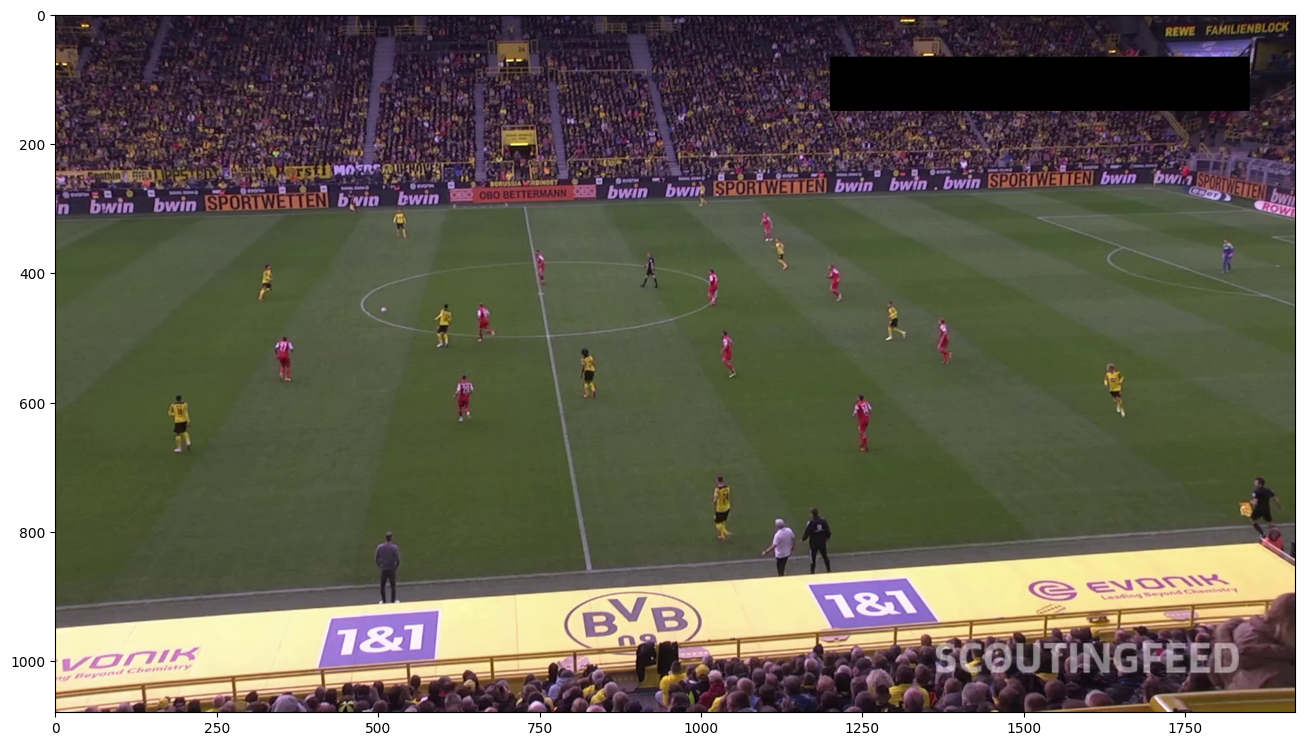

In [ ]:
frame = next(frame_iterator)
plot_image(frame, 16)

In [ ]:
import torch
model=torch.hub.load('ultralytics/yolov5','custom',WEIGHTS_PATH,device=0)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-160-g867f7f0 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /content/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 416 layers, 139999708 parameters, 0 gradients, 207.9 GFLOPs
Adding AutoShape... 


In [ ]:
results=model(frame,size=1280)
results.pandas()

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 1080x1920 1 goalkeeper, 20 players, 4 referees
Speed: 16.2ms pre-process, 172.7ms inference, 2.0ms NMS per image at shape (1, 3, 768, 1280)

In [ ]:
results.pred[0]

tensor([[1.74366e+02, 5.88411e+02, 2.12462e+02, 6.79132e+02, 9.65429e-01, 2.00000e+00],
        [1.23334e+03, 5.86993e+02, 1.26621e+03, 6.77698e+02, 9.64604e-01, 2.00000e+00],
        [1.01734e+03, 7.12881e+02, 1.04966e+03, 8.15370e+02, 9.64090e-01, 2.00000e+00],
        [3.40006e+02, 4.95694e+02, 3.71537e+02, 5.68818e+02, 9.61107e-01, 2.00000e+00],
        [1.62369e+03, 5.40275e+02, 1.65875e+03, 6.25536e+02, 9.60790e-01, 2.00000e+00],
        [6.16345e+02, 5.55806e+02, 6.48904e+02, 6.32069e+02, 9.59682e-01, 2.00000e+00],
        [8.11958e+02, 5.16391e+02, 8.39266e+02, 5.95074e+02, 9.57909e-01, 2.00000e+00],
        [1.02965e+03, 4.88635e+02, 1.05497e+03, 5.62350e+02, 9.55938e-01, 2.00000e+00],
        [6.52442e+02, 4.46462e+02, 6.82719e+02, 5.07663e+02, 9.54251e-01, 2.00000e+00],
        [1.28548e+03, 4.42551e+02, 1.31827e+03, 5.06050e+02, 9.53473e-01, 2.00000e+00],
        [5.86302e+02, 4.47200e+02, 6.14393e+02, 5.17227e+02, 9.52129e-01, 2.00000e+00],
        [3.13588e+02, 3.85179e+0

In [ ]:
model.names

{0: 'ball', 1: 'goalkeeper', 2: 'player', 3: 'referee'}

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
!cd ByteTrack && pip3 install -r requirements.txt
!cd ByteTrack && python3 setup.py develop
!pip install cython_bbox lap loguru
!pip install onemetric --quiet

/content/yolov5
Cloning into 'ByteTrack'...
remote: Enumerating objects: 2007, done.
remote: Total 2007 (delta 0), reused 0 (delta 0), pack-reused 2007
Receiving objects: 100% (2007/2007), 79.60 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (1141/1141), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 673.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 97.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build whe

In [ ]:
import sys
sys.path.append(f'{HOME}/ByteTrack')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.2 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached loguru-0.7.0-py3-none-any.whl (59 kB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached lap-0.4.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for lap: filename=lap-0.4.0-cp310-cp310-linux_x86_64.whl size=1655271 sha256=5f05541c21118d40de7cc1eae050936e2545c44682b656fe81867db184b30fd2
  Stored in directory: /root/.cache/pip/wheels/00/42/2e/9dfe19270eea279d79e84767ff0d7b8082c3bf776cad00e83d
Successfully built lap


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker,STrack
from onemetric.cv.utils.iou import box_iou_batch

In [ ]:
from dataclasses import dataclass

@dataclass(frozen=True)
class BYTETrackerArgs:
  track_thresh:float=0.25
  track_buffer: int = 30
  match_thresh: float = 0.8
  aspect_ratio_thresh: float = 3.0
  min_box_area: float = 1.0
  mot20:bool=False

In [ ]:
from __future__ import annotations
from dataclasses import dataclass,field
from typing import Tuple, Optional, List, Dict, Any

import cv2
import numpy as np

@dataclass(frozen=True)
class Point:
  x:float
  y:float

  @property
  def int_xy_tuple(self)->Tuple[int,int]:
    return int(self.x),int(self.y)


@dataclass(frozen=True)
class Rect:
  x:float
  y:float
  width:float
  height:float

  @property
  def min_x(self)->float:
    return self.x
  
  @property
  def min_y(self)->float:
    return self.y

  @property
  def max_x(self)->float:
    return self.x + self.width

  @property
  def max_y(self)->float:
    return self.y + self.height

  @property
  def top_left(self)->Point:
    return Point(x=self.x,y=self.y)
  
  @property
  def bottom_right(self)->Point:
    return Point(x=self.x+self.width,y=self.y+self.height)
  
  @property
  def bottom_center(self)->Point:
    return Point(x=self.x+self.width/2,y=self.y+self.height)

  @property
  def top_center(self)->Point:
    return Point(x=self.x+self.width/2,y=self.y)

  @property
  def center(self)->Point:
    return Point(x=self.x + self.width/2,y=self.y + self.height/2)

  def pad(self,padding:float)->Rect:
    return Rect(
        x=self.x-padding,
        y=self.y-padding,
        width=self.width + 2*padding,
        height=self.height + 2*padding
    )

  def contains_point(self,point:Point)->bool:
    return self.min_x<point.x<self.max_x and self.min_y<point.y<self.max_y

@dataclass
class Detection:
    rect: Rect
    class_id: int
    class_name: str
    confidence: float
    tracker_id: Optional[int]=None

    @classmethod
    def from_results(cls,pred:np.ndarray,names:Dict[int,str])->List[Detection]:
      result=[]
      for x_min,y_min,x_max,y_max,confidence,class_id in pred:
        class_id=int(class_id)
        result.append(Detection(
            rect=Rect(
                x=float(x_min),
                y=float(y_min),
                width=float(x_max-x_min),
                height=float(y_max-y_min)
            ),
            class_id=class_id,
            class_name=names[class_id],
            confidence=float(confidence)
        ))
      return result

def filter_detections_by_class(detections:List[Detection],class_name:str)->List[Detection]:
  return [detection for detection in detections if detection.class_name==class_name]


@dataclass(frozen=True)
class Color:
  r:int
  g:int
  b:int

  @property
  def bgr_tuple(self)->Tuple[int,int,int]:
    return self.b,self.g,self.r

  @classmethod
  def from_hex_string(cls,hex_string:str)->Color:
    r,g,b=tuple(int(hex_string[1+i:1+i+2],16) for i in (0,2,4))
    return Color(r=r,g=g,b=b)

def draw_rect(image:np.ndarray,rect:Rect,color:Color,thickness:int=2)->np.ndarray:
  cv2.rectangle(image,rect.top_left.int_xy_tuple,rect.bottom_right.int_xy_tuple,color.bgr_tuple,thickness)
  return image

def draw_filled_rect(image:np.ndarray,rect:Rect,color:Color)->np.ndarray:
  cv2.rectangle(image,rect.top_left.int_xy_tuple,rect.bottom_right.int_xy_tuple,color.bgr_tuple,-1)
  return image
  
def draw_polygon(image:np.ndarray,contour:np.ndarray,color:Color,thickness:int=2)->np.ndarray:
  cv2.drawContours(image, [contour], 0, color.bgr_tuple, thickness)
  return image

def draw_filled_polygon(image:np.ndarray,contour:np.ndarray,color:Color)->np.ndarray:
  cv2.drawContours(image,[contour],0,color.bgr_tuple,-1)
  return image

def draw_text(image:np.ndarray,anchor:Point,text:str,color:Color,thickness:int=2)->np.ndarray:
  cv2.putText(image, text, anchor.int_xy_tuple, cv2.FONT_HERSHEY_SIMPLEX, 0.7, color.bgr_tuple, thickness, 2, False)
  return image

def draw_ellipse(image:np.ndarray,rect:Rect,color:Color,thickness:int=2)->np.ndarray:
  cv2.ellipse(
      image,
      center=rect.bottom_center.int_xy_tuple,
      axes=(int(rect.width),int(0.35*rect.width)),
      angle=0.0,
      startAngle=-45,
      endAngle=235,
      color=color.bgr_tuple,
      thickness=thickness,
      lineType=cv2.LINE_4
  )
  return image

@dataclass
class BaseAnnotator:
  colors:List[Color]
  thickness:int

  def annotate(self,image:np.ndarray,detections:List[Detection])->np.ndarray:
    annotated_image=image.copy()
    for detection in detections:
      annotated_image=draw_ellipse(
          image=image,
          rect=detection.rect,
          color=self.colors[detection.class_id],
          thickness=self.thickness
      )
    return annotated_image




  

In [ ]:
#white
BALL_COLOR_HEX='#FFFFFF'
BALL_COLOR=Color.from_hex_string(BALL_COLOR_HEX)

#red
GOALKEEPER_COLOR_HEX='#850101'
GOALKEEPER_COLOR=Color.from_hex_string(GOALKEEPER_COLOR_HEX)

#green
PLAYER_COLOR_HEX='#00D4BB'
PLAYER_COLOR=Color.from_hex_string(PLAYER_COLOR_HEX)

#yellow
REFEREE_COLOR_HEX='#FFFF00'
REFEREE_COLOR=Color.from_hex_string(REFEREE_COLOR_HEX)

COLORS=[
    BALL_COLOR,
    GOALKEEPER_COLOR,
    PLAYER_COLOR,
    REFEREE_COLOR
]
THICKNESS=4


In [ ]:
frame_iterator=iter(generate_frames(video_file=SOURCE_VIDEO_PATH))

In [ ]:
annotator=BaseAnnotator(
    colors=COLORS,
    thickness=THICKNESS
)

frame=next(frame_iterator)

results=model(frame,size=1280)
detections=Detection.from_results(
    pred=results.pred[0].cpu().numpy(),
    names=model.names
)
annotated_image=annotator.annotate(
    image=frame,
    detections=detections
    )

plot_image(annotated_image,16)

In [ ]:
MARKER_CONTOUR_COLOR_HEX="000000"
MARKER_CONTOUR_COLOR=Color.from_hex_string(MARKER_CONTOUR_COLOR_HEX)

PLAYER_MARKER_FILL_COLOR_HEX="FF0000"
PLAYER_MARKER_FILL_COLOR=Color.from_hex_string(PLAYER_MARKER_FILL_COLOR_HEX)

BALL_MARKER_FILL_COLOR_HEX="00FF00"
BALL_MARKER_FILL_COLOR=Color.from_hex_string(BALL_MARKER_FILL_COLOR_HEX)

MARKER_CONTOUR_THICKNESS=2
MARKER_WIDTH=20
MARKER_HEIGHT=20
MARKER_MARGIN=10

PLAYER_IN_POSSESSION_PROXIMITY=30


In [ ]:
from typing import List
import numpy as np

def calculate_marker(anchor:Point)->np.ndarray:
  x,y=anchor.int_xy_tuple
  return (np.array([
      [x-MARKER_WIDTH // 2,y-MARKER_HEIGHT - MARKER_MARGIN],
      [x,y-MARKER_MARGIN],
      [x+ MARKER_WIDTH//2,y-MARKER_HEIGHT-MARKER_MARGIN]
  ]))

def draw_marker(image:np.ndarray,anchor:Point,color:Color)->np.ndarray:
  possession_marker_contour=calculate_marker(anchor=anchor)
  image=draw_filled_polygon(
      image=image,
      contour=possession_marker_contour,
      color=color
  )
  image=draw_polygon(
      image=image,
      contour=possession_marker_contour,
      color=MARKER_CONTOUR_COLOR,
      thickness=MARKER_CONTOUR_THICKNESS
  )

  return image

@dataclass
class MarkerAnnotator:
  color:Color

  def annotate(self,image:np.ndarray,detections:List[Detection])->np.ndarray:
    annotated_image=image.copy()
    for detection in detections:
      annotated_image=draw_marker(
          image=image,
          anchor=detection.rect.top_center,
          color=self.color
      )
    return annotated_image

In [ ]:
from typing import List,Optional

def get_player_in_possession(
    player_detections:List[Detection],
    ball_detections:List[Detection],
    proximity:int)->Optional[Detection]:
    if len(ball_detections)!=1:
      return None
    ball_detection=ball_detections[0]
    for player_detection in player_detections:
      if player_detection.rect.pad(proximity).contains_point(point=ball_detection.rect.center):
        return player_detection


In [ ]:
ball_marker_annotator=MarkerAnnotator(color=BALL_MARKER_FILL_COLOR)
player_marker_annotator=MarkerAnnotator(color=PLAYER_MARKER_FILL_COLOR)

frame=next(frame_iterator)

results=model(frame,size=1280)
detections=Detection.from_results(
    pred=results.pred[0].cpu().numpy(),
    names=model.names
)

ball_detections=filter_detections_by_class(detections=detections,class_name="ball")
player_detections=filter_detections_by_class(detections=detections,class_name="player")
player_in_possession_detection=get_player_in_possession(
    player_detections=player_detections,
    ball_detections=ball_detections,
    proximity=PLAYER_IN_POSSESSION_PROXIMITY
)

annotated_image=frame.copy()
annotated_image=ball_marker_annotator.annotate(
    image=annotated_image,
    detections=ball_detections
)

annotated_image=player_marker_annotator.annotate(
    image=annotated_image,
    detections=[player_in_possession_detection] if player_in_possession_detection else []
)

plot_image(annotated_image,16)

In [ ]:
SOURCE_VIDEO_PATH=f'/content/data/MyDrive/clips/0a2d9b_6.mp4'
TARGET_VIDEO_PATH=f'/content/data/MyDrive/ball-possession/0a2d9b_6.mp4'

In [ ]:
from dataclasses import dataclass
import cv2

@dataclass(frozen=True)
class VideoConfig:
  fps:float
  width:int
  height:int

def get_video_writer(target_video_path:str,video_config:VideoConfig)->cv2.VideoWriter:
  video_target_dir=os.path.dirname(os.path.abspath(target_video_path))
  os.makedirs(video_target_dir,exist_ok=True)
  return cv2.VideoWriter(
      target_video_path,
      fourcc=cv2.VideoWriter_fourcc(*'mp4v'),
      fps=video_config.fps,
      frameSize=(video_config.width,video_config.height),
      isColor=True
  )

In [ ]:
from tqdm.notebook import tqdm

video_config=VideoConfig(
    fps=30,
    width=1920,
    height=1080
)

video_writer=get_video_writer(
    target_video_path=TARGET_VIDEO_PATH,
    video_config=video_config
)

frame_iterator=iter(generate_frames(video_file=SOURCE_VIDEO_PATH))

ball_marker_annotator=MarkerAnnotator(color=BALL_MARKER_FILL_COLOR)

for frame in tqdm(frame_iterator,total=750):

  results=model(frame,size=1280)
  detections=Detection.from_results(
      pred=results.pred[0].cpu().numpy(),
      names=model.names
  )

  ball_detections=filter_detections_by_class(detections=detections,class_name="ball")
  goalkeeper_detections=filter_detections_by_class(detections=detections,class_name='goalkeeper')
  player_detections=filter_detections_by_class(detections=detections,class_name='f_player')
  player_in_possession_detection=get_player_in_possession(
      player_detections=player_detections,
      ball_detections=ball_detections,
      proximity=PLAYER_IN_POSSESSION_PROXIMITY
  )

  annotated_image=frame.copy()
  annotated_image=ball_marker_annotator.annotate(
      image=annotated_image,
      detections=ball_detections
  )

  annotated_image = player_marker_annotator.annotate(
        image=annotated_image, 
        detections=[player_in_possession_detection] if player_in_possession_detection else [])
    

  video_writer.write(annotated_image)

video_writer.release()

  


  0%|          | 0/750 [00:00<?, ?it/s]

In [ ]:
SOURCE_VIDEO_PATH=f'/content/data/MyDrive/clips/0a2d9b_6.mp4'
TARGET_VIDEO_PATH=f'/content/data/MyDrive/tracking/0a2d9b_6.mp4'

In [ ]:
from typing import List
import numpy as np


def detections2boxes(detections: List[Detection],with_confidence:bool=True)-> np.ndarray:
  return np.array([
      [
          detection.rect.top_left.x,
       detection.rect.top_left.y,
       detection.rect.bottom_right.x,
       detection.rect.bottom_right.y,
       detection.confidence
      ] if with_confidence else [
          detection.rect.top_left.x,
          detection.rect.top_left.y,
          detection.rect.bottom_right.x,
          detection.rect.bottom_right.y
      ]
      for detection in detections
  ],dtype=float)


def tracks2boxes(tracks:List[STrack])->np.ndarray:
  return np.array([
      track.tlbr for track in tracks
  ],dtype=float)


def match_detections_with_tracks( detections:List[Detection],tracks:List[STrack])-> List[Detection]:
  detection_boxes=detections2boxes(detections=detections,with_confidence=False)
  tracks_boxes=tracks2boxes(tracks=tracks)
  iou=box_iou_batch(tracks_boxes,detection_boxes)
  track2detection=np.argmax(iou,axis=1)

  for tracker_index,detection_index in enumerate(track2detection):
    if iou[tracker_index,detection_index] !=0:
      detections[detection_index].tracker_id=tracks[tracker_index].track_id
  return detections

In [ ]:
@dataclass
class TextAnnotator:
  background_color:Color
  text_color:Color
  text_thickness:int

  def annotate(self,image:np.ndarray,detections:List[Detection])-> np.ndarray:
    annotated_image=image.copy()
    for detection in detections:
      if detection.tracker_id is None:
        continue
      
      size,_ = cv2.getTextSize(
          str(detection.tracker_id),
          cv2.FONT_HERSHEY_SIMPLEX,
          0.7,
          thickness=self.text_thickness
      )
      width,height=size

      center_x,center_y=detection.rect.bottom_center.int_xy_tuple
      x=center_x - width//2
      y=center_y - height//2 + 10

      annotated_image=draw_filled_rect(
          image=annotated_image,
          rect=Rect(x=x,y=y,width=width,height=height).pad(padding=5),
          color=self.background_color
      )

      annotated_image=draw_text(
          image=annotated_image,
          anchor=Point(x=x,y=y+height),
          text=str(detection.tracker_id),
          color=self.text_color,
          thickness=self.text_thickness
      )

    return annotated_image

In [ ]:
from tqdm.notebook import tqdm

video_config=VideoConfig(
    fps=30,
    width=1920,
    height=1080)

video_writer=get_video_writer(
    target_video_path=TARGET_VIDEO_PATH,
    video_config=video_config
)

frame_iterator=iter(generate_frames(video_file=SOURCE_VIDEO_PATH))

text_annotator=TextAnnotator(background_color=Color(255,255,255),text_color=Color(0,0,0),text_thickness=2)

byte_tracker=BYTETracker(BYTETrackerArgs())

for frame in tqdm(frame_iterator,total=750):
  results=model(frame,size=1280)
  detections=Detection.from_results(
      pred=results.pred[0].cpu().numpy(),
      names=model.names
  )

  goalkeeper_detections=filter_detections_by_class(detections=detections,class_name="goalkeeper")
  player_detections=filter_detections_by_class(detections=detections,class_name="player")
  player_detections=player_detections+goalkeeper_detections

  tracks=byte_tracker.update(
      output_results=detections2boxes(detections=player_detections),
      img_info=frame.shape,
      img_size=frame.shape
  )

  player_detections=match_detections_with_tracks(detections=player_detections,tracks=tracks)
  annotated_image=frame.copy()
  annotated_image=text_annotator.annotate(
      image=annotated_image,
      detections=player_detections
  )

  video_writer.write(annotated_image)

video_writer.release()


  0%|          | 0/750 [00:00<?, ?it/s]

In [ ]:
SOURCE_VIDEO_PATH=f'/content/data/MyDrive/clips/0a2d9b_6.mp4'
TARGET_VIDEO_PATH=f'/content/data/MyDrive/final/0a2d9b_6.mp4'

In [ ]:

from tqdm.notebook import tqdm


video_config = VideoConfig(
    fps=30, 
    width=1920, 
    height=1080)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO_PATH, 
    video_config=video_config)


frame_iterator = iter(generate_frames(video_file=SOURCE_VIDEO_PATH))


base_annotator = BaseAnnotator(
    colors=[
        BALL_COLOR,
        PLAYER_COLOR,
        PLAYER_COLOR,
        REFEREE_COLOR
    ], 
    thickness=THICKNESS)

player_goalkeeper_text_annotator = TextAnnotator(
    PLAYER_COLOR, text_color=Color(255, 255, 255), text_thickness=2)
referee_text_annotator = TextAnnotator(
    REFEREE_COLOR, text_color=Color(0, 0, 0), text_thickness=2)

ball_marker_annotator = MarkerAnnotator(
    color=BALL_MARKER_FILL_COLOR)
player_in_possession_marker_annotator = MarkerAnnotator(
    color=PLAYER_MARKER_FILL_COLOR)



byte_tracker = BYTETracker(BYTETrackerArgs())


for frame in tqdm(frame_iterator, total=750):


    results = model(frame, size=1280)
    detections = Detection.from_results(
        pred=results.pred[0].cpu().numpy(), 
        names=model.names)
    

    ball_detections = filter_detections_by_class(detections=detections, class_name="ball")
    referee_detections = filter_detections_by_class(detections=detections, class_name="referee")
    goalkeeper_detections = filter_detections_by_class(detections=detections, class_name="goalkeeper")
    player_detections = filter_detections_by_class(detections=detections, class_name="player")
    
    player_goalkeeper_detections = player_detections + goalkeeper_detections
    tracked_detections = player_detections + goalkeeper_detections + referee_detections


    player_in_possession_detection = get_player_in_possession(
        player_detections=player_goalkeeper_detections,
        ball_detections=ball_detections,
        proximity=PLAYER_IN_POSSESSION_PROXIMITY)


    tracks = byte_tracker.update(
        output_results=detections2boxes(detections=tracked_detections),
        img_info=frame.shape,
        img_size=frame.shape
    )
    tracked_detections = match_detections_with_tracks(detections=tracked_detections, tracks=tracks)

    tracked_referee_detections = filter_detections_by_class(detections=tracked_detections, class_name="referee")
    tracked_goalkeeper_detections = filter_detections_by_class(detections=tracked_detections, class_name="goalkeeper")
    tracked_player_detections = filter_detections_by_class(detections=tracked_detections, class_name="player")


    annotated_image = frame.copy()
    annotated_image = base_annotator.annotate(
        image=annotated_image, 
        detections=tracked_detections)
    
    annotated_image = player_goalkeeper_text_annotator.annotate(
        image=annotated_image, 
        detections=tracked_goalkeeper_detections + tracked_player_detections)
    annotated_image = referee_text_annotator.annotate(
        image=annotated_image, 
        detections=tracked_referee_detections)
    
    annotated_image = ball_marker_annotator.annotate(
        image=annotated_image, 
        detections=ball_detections)
    annotated_image = player_marker_annotator.annotate(
        image=annotated_image, 
        detections=[player_in_possession_detection] if player_in_possession_detection else [])


    video_writer.write(annotated_image)


video_writer.release()


  0%|          | 0/750 [00:00<?, ?it/s]

(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1